In [121]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [122]:
colnames = ['scan_count', 'temp', 'pressure', 'conductivity', 'oxygen_raw', 'fluorescence', 'turbidity', 'oxygen_conc', 'salinity', 'density', 'oxygen_sat', 'pot_temp', 'ref_salinity', 'conservative_temp', 'density_teos', 'abs_salinity', 'nbin', 'flag']

#control
loc0_df = pd.read_table('../data/loc1.xsl', delim_whitespace=True)
loc0_df.columns = colnames

#carnation creek
loc1_df = pd.read_table('../data/loc2.xsl', delim_whitespace=True)
loc1_df.columns = colnames

#sarita river
loc2_df = pd.read_table('../data/loc3.xsl', delim_whitespace=True)
loc2_df.columns = colnames

C:\Users\hiros\AppData\Local\Temp\ipykernel_20272\1096526573.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  loc0_df = pd.read_table('../data/loc1.xsl', delim_whitespace=True)
C:\Users\hiros\AppData\Local\Temp\ipykernel_20272\1096526573.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  loc1_df = pd.read_table('../data/loc2.xsl', delim_whitespace=True)
C:\Users\hiros\AppData\Local\Temp\ipykernel_20272\1096526573.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  loc2_df = pd.read_table('../data/loc3.xsl', delim_whitespace=True)


In [123]:
alt.Chart(loc0_df).mark_circle().encode(alt.Y('pressure', scale=alt.Scale(reverse=True), type = 'quantitative'), alt.X('temp'))

<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [124]:
cols = ['temp', 'conductivity', 'fluorescence', 'oxygen_conc', 'salinity', 'density']

In [125]:
charts = []
for col in cols:
    charts.append(alt.Chart(loc0_df).mark_circle().encode(alt.Y('pressure', scale=alt.Scale(reverse=True), type = 'quantitative'), alt.X(col, type = 'quantitative')))

alt.hconcat(*charts)


<VegaLite 5 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/display_frontends.html#troubleshooting


In [126]:
loc0_df['location'] = 'Control'
loc1_df['location'] = 'Carnation Creek'
loc2_df['location'] = 'Sarita River'

df_combined = pd.concat([loc0_df,loc1_df,loc2_df], ignore_index=True)

In [127]:
charts = []
for col in cols:
    charts.append(alt.Chart(df_combined).mark_circle().encode(alt.Y('pressure', scale=alt.Scale(reverse=True), type = 'quantitative'), alt.X(col, type = 'quantitative', scale=alt.Scale(zero=False)), alt.Color('location')).properties(height=700))

unsliced = alt.vconcat(alt.hconcat(*charts[0:3]),alt.hconcat(*charts[3:7]))

In [128]:
df_combined_5 = df_combined[df_combined['pressure'] >= 5]
charts = []
for col in cols:
    charts.append(alt.Chart(df_combined_5).mark_circle().encode(alt.Y('pressure', scale=alt.Scale(reverse=True, zero=False), type = 'quantitative'), alt.X(col, type = 'quantitative', scale=alt.Scale(zero=False)), alt.Color('location')).properties(height=700))

sliced = alt.vconcat(alt.hconcat(*charts[0:3]),alt.hconcat(*charts[3:7]))

In [129]:
sliced.save('ctd_sliced.png')
unsliced.save('ctd_graphs.png')

c:\Users\hiros\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\hiros\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


In [130]:
ts = alt.Chart(df_combined).mark_circle().encode(alt.Y('temp', scale=alt.Scale(zero=False), type = 'quantitative'), alt.X('salinity', type = 'quantitative', scale=alt.Scale(zero=False)), alt.Color('location'))

In [131]:
ts.save('ts_graph.png')

c:\Users\hiros\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


<a list of 19 text.Text objects>

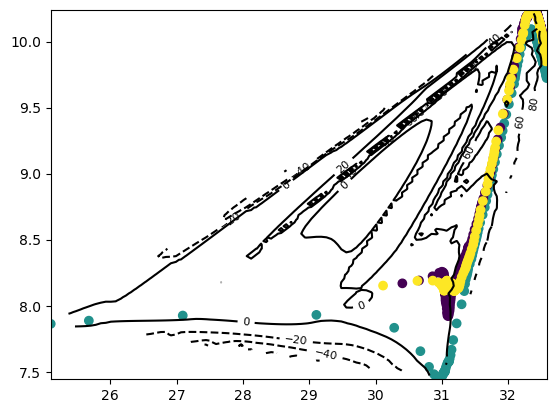

In [132]:
from sklearn.preprocessing import LabelEncoder
from scipy.interpolate import griddata

le = LabelEncoder()
df_combined['location_encoded'] = le.fit_transform(df_combined['location'])
plt.scatter(df_combined['salinity'], df_combined['temp'], c=df_combined['location_encoded'])

sal_grid = np.linspace(df_combined['salinity'].min(), df_combined['salinity'].max(), 100)
temp_grid = np.linspace(df_combined['temp'].min(), df_combined['temp'].max(), 100)
X, Y = np.meshgrid(sal_grid, temp_grid)

# Interpolate pressure onto the grid
Z = griddata((df_combined['salinity'], df_combined['temp']), df_combined['pressure'], (X, Y), method='cubic')

# Plot contour of pressure
contours = plt.contour(X, Y, Z, levels=10, colors='black')
plt.clabel(contours, inline=True, fontsize=8)  # Add labels

In [133]:
df_combined_10 = df_combined[df_combined['pressure'] <= 10]
charts = []
for col in cols:
    charts.append(alt.Chart(df_combined_10).mark_circle().encode(alt.Y('pressure', scale=alt.Scale(reverse=True, zero=False), type = 'quantitative'), alt.X(col, type = 'quantitative', scale=alt.Scale(zero=False)), alt.Color('location')).properties(height=700))

top10 = alt.vconcat(alt.hconcat(*charts[0:3]),alt.hconcat(*charts[3:7]))

top10.save('top_graph.png')

c:\Users\hiros\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
